# Problem Statement 1.Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

In [733]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline
from warnings import filterwarnings     
filterwarnings("ignore")
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

### Importing data

In [759]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("cubic_zirconia (2).csv") 

In [760]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


### EDA

In [736]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [763]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [738]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 0


In [764]:
df.describe(include="all")

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,13484.000000,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [765]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [766]:
df.shape

(26967, 11)

In [741]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [742]:
df.shape

(26967, 11)

In [767]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [768]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [743]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [744]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [745]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [769]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


In [805]:
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.394481,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [771]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (26967, 11)
After (26967, 11)


In [772]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [773]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [774]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.5+ MB


In [797]:
data_df = df.drop('Unnamed: 0', axis=1)

In [814]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


In [803]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26908 entries, 0 to 26966
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   26908 non-null  float64
 1   depth   26908 non-null  float64
 2   table   26908 non-null  float64
 3   x       26908 non-null  float64
 4   y       26908 non-null  float64
 5   z       26908 non-null  float64
 6   price   26908 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 1.6 MB


In [806]:
data_df.describe()

,carat,depth,table,x,y,z,price
count,26908.000000,26908.000000,26908.000000,26908.000000,26908.000000,26908.000000,26908.000000
mean,0.798111,61.745465,57.455779,5.730186,5.733952,3.539310,3938.233202
std,0.477093,1.393787,2.231707,1.125970,1.163739,0.717436,4021.470746
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.500000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [815]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [816]:
df.columns

Index(['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [800]:
data_df = data_df.drop(data_df[data_df["x"]==0].index)
data_df = data_df.drop(data_df[data_df["y"]==0].index)
data_df = data_df.drop(data_df[data_df["z"]==0].index)
data_df.shape

(26958, 7)

In [817]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [818]:
print('Before',data_df.shape)
data_df.drop_duplicates(inplace=True) 
print('After',data_df.shape)

Before (26908, 7)
After (26908, 7)


In [819]:
data_df.isnull().sum()

carat    0
depth    0
table    0
x        0
y        0
z        0
price    0
dtype: int64

## Observations -
 The above dataset contains 26967 rows & 10 columns.
- The variables 'cut', 'color' and 'clarity' are of object datatype, whereas the rest of the variables 
are of numerical (integer & float) datatype.
- There are 697 null values in the dataset. Hence, we need to investigate further to treat them.
- The dataset does have a few duplicate values as well. Since, they are few in numbers compared 
to the entire dataset, we will remove them.
- The summary table shows mean, standard deviation, minimum & maximum values, etc. for all 
the variables. Variables 'x', 'y' & 'z' (namely length, width & height) have minimum values 0, 
which is impossible. Hence, we need to investigate it further.

### Univariate Analysis

In [820]:
df= df.copy()
df= df.drop(['cut','color','clarity'],axis=1)

KeyError: "['cut' 'color' 'clarity'] not found in axis"

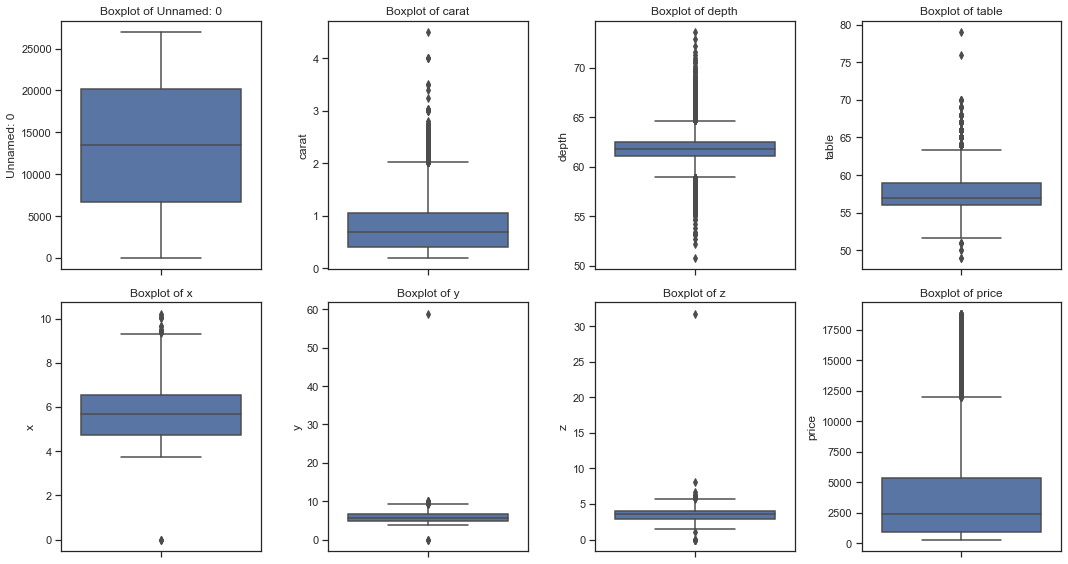

In [821]:
plt.figure(figsize=(15,8))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

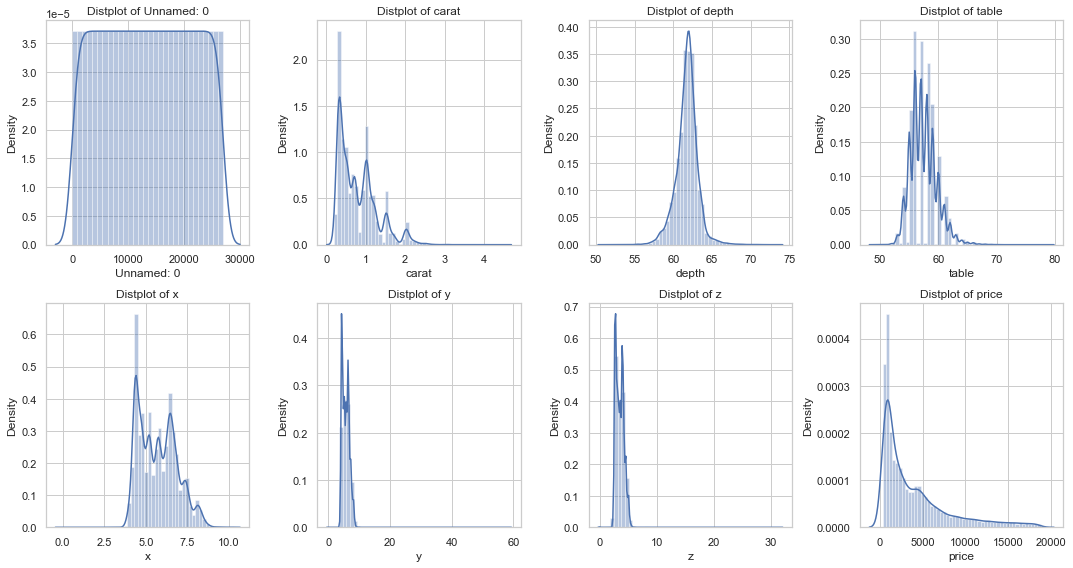

In [784]:
plt.figure(figsize=(15,8))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(2, 4, i + 1)
    sns.distplot(df[df.columns[i]])
    plt.title('Distplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [822]:
df.skew(axis = 0)

Unnamed: 0    0.000000
carat         1.116481
depth        -0.028995
table         0.765758
x             0.387986
y             3.850189
z             2.568257
price         1.618550
dtype: float64

### Multivariate Analysis

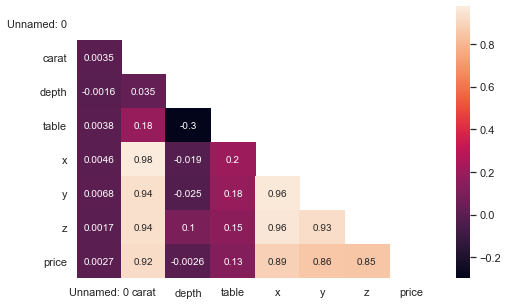

In [786]:
plt.figure(figsize=(8,5));
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,annot=True,mask=mask);

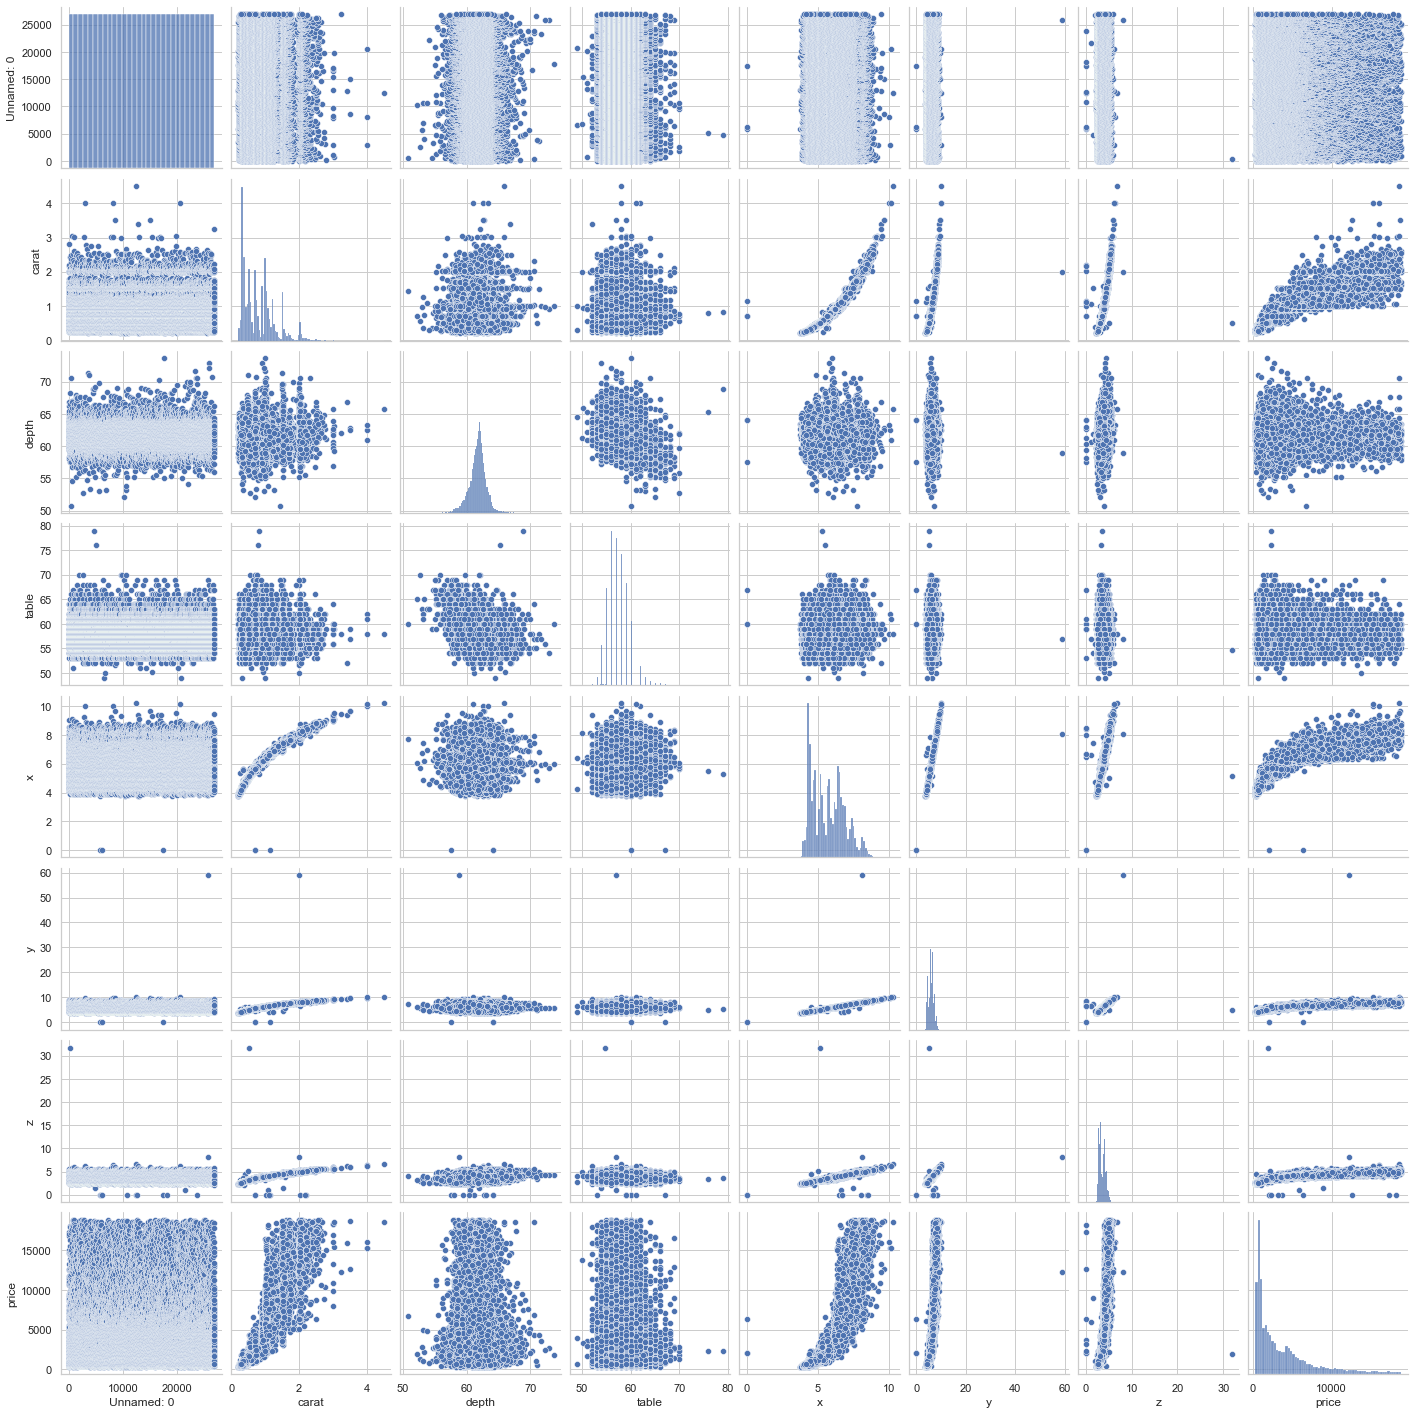

In [787]:
sns.pairplot(df);

## 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [788]:
data_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [824]:
for column in data_df.columns:
    if data_df[column].dtype != 'object':
        mean = df[column].mean()
        data_df[column] = df[column].fillna(mean)    
        
data_df.isnull().sum()        

carat    0
depth    0
table    0
x        0
y        0
z        0
price    0
dtype: int64

In [790]:
data_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [613]:
data_df.describe(include="all")

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26925.000000,26925,26925,26925,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,3,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10805,5650,6564,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797821,NaN,NaN,NaN,61.746982,57.455305,5.729385,5.733152,3.538820,3936.249991
std,0.477085,NaN,NaN,NaN,1.393457,2.231327,1.126081,1.163820,0.717483,4020.983187
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,NaN,NaN,NaN,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.700000,3.520000,2373.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5353.000000


In [614]:
dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


In [615]:
for column in data_df.columns:
    if data_df[column].dtype == 'object':
        print(column.upper(),': ',data_df[column].nunique())
        print(data_df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           779
Good          2434
Very Good     6027
Premium       6880
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
0    1440
1    2765
6    3341
2    4091
4    4722
5    4916
3    5650
Name: color, dtype: int64


CLARITY :  8
I1       362
IF       891
VVS1    1839
VVS2    2530
VS1     4086
SI2     4561
VS2     6092
SI1     6564
Name: clarity, dtype: int64




In [616]:
data_df.mean()

carat       0.797821
color            inf
depth      61.746982
table      57.455305
x           5.729385
y           5.733152
z           3.538820
price    3936.249991
dtype: float64

In [617]:
data_df=data_df.fillna(df.median())

In [618]:
data_df.mode()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.3,Ideal,3,SI1,61.8,56.0,4.38,4.35,2.69,544.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.70,NaN


In [619]:
data_df.median()

carat       0.70
color       3.00
depth      61.80
table      57.00
x           5.69
y           5.70
z           3.52
price    2373.00
dtype: float64

In [620]:
dada_df=data_df.fillna(df.median())

In [621]:
dada_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

## 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [831]:
df.columns

Index(['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [832]:
data_df.dtypes

carat    float64
depth    float64
table    float64
x        float64
y        float64
z        float64
price      int64
dtype: object

In [833]:
data_df['color']=np.where(data_df['color'] =='D', '6', data_df['color'])
data_df['color']=np.where(data_df['color'] =='E', '5', data_df['color'])
data_df['color']=np.where(data_df['color'] =='F', '4', data_df['color'])
data_df['color']=np.where(data_df['color'] =='G', '3', data_df['color'])
data_df['color']=np.where(data_df['color'] =='H', '2', data_df['color'])
data_df['color']=np.where(data_df['color'] =='I', '1', data_df['color'])
data_df['color']=np.where(data_df['color'] =='J', '0', data_df['color'])

KeyError: 'color'

In [625]:
dada_df['cut']= np.where(dada_df['cut'] =='Ideal', '0', dada_df['cut'])
dada_df['cut']= np.where(dada_df['cut'] =='Premium', '1', dada_df['cut'])
dada_df['cut']= np.where(dada_df['cut'] =='Premium', '1', dada_df['cut'])
dada_df['cut']= np.where(dada_df['cut'] =='Very Good', '2', dada_df['cut'])
dada_df['cut']= np.where(dada_df['cut'] =='Good', '3', dada_df['cut'])
dada_df['cut']= np.where(dada_df['cut'] =='Fair', '4', dada_df['cut'])

In [626]:
dada_df['clarity']=np.where(dada_df['clarity'] =='SI1', '0', dada_df['clarity'])
dada_df['clarity']=np.where(dada_df['clarity'] =='VS2', '1', dada_df['clarity'])
dada_df['clarity']=np.where(dada_df['clarity'] =='SI2', '2', dada_df['clarity'])
dada_df['clarity']=np.where(dada_df['clarity'] =='VS1', '3', dada_df['clarity'])
dada_df['clarity']=np.where(dada_df['clarity'] =='VVS2', '4',dada_df['clarity'])
dada_df['clarity']=np.where(dada_df['clarity'] =='VVS1', '5',dada_df['clarity'])
dada_df['clarity']=np.where(dada_df['clarity'] =='IF', '6',  dada_df['clarity'])
dada_df['clarity']=np.where(dada_df['clarity'] =='I1', '7',  dada_df['clarity'])

In [627]:
dada_df['clarity'] = dada_df['clarity'].astype('float64')

In [628]:
dada_df['cut'] = dada_df['cut'].astype('float64')

In [629]:
dada_df['color'] = dada_df['color'].astype('float64')


In [827]:
data_df.head(10)

,carat,depth,table,x,y,z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499
1,0.33,60.8,58.0,4.42,4.46,2.70,984
2,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,60.4,59.0,4.35,4.43,2.65,779
5,1.02,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,60.5,57.0,4.52,4.60,2.76,706


In [630]:
dada_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,0.0,5.0,0.0,62.1,58.0,4.27,4.29,2.66,499
1,0.33,1.0,3.0,6.0,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2.0,5.0,4.0,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,0.0,4.0,3.0,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,0.0,4.0,5.0,60.4,59.0,4.35,4.43,2.65,779


In [631]:
dada_df['clarity'] = dada_df['clarity'].astype('float64')

In [632]:
dada_df.dtypes

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [633]:
# Copy all the predictor variables into X dataframe
X = dada_df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = dada_df[['price']]

In [634]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,0.0,5.0,0.0,62.1,58.0,4.27,4.29,2.66
1,0.33,1.0,3.0,6.0,60.8,58.0,4.42,4.46,2.70
2,0.90,2.0,5.0,4.0,62.2,60.0,6.04,6.12,3.78
3,0.42,0.0,4.0,3.0,61.6,56.0,4.82,4.80,2.96
4,0.31,0.0,4.0,5.0,60.4,59.0,4.35,4.43,2.65


In [635]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [636]:
# invoke the LinearRegression function and find the bestfit model on training data
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [637]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 11398.771362453324
The coefficient for cut is -165.4352925997742
The coefficient for color is 278.0216969804327
The coefficient for clarity is 125.86262495527605
The coefficient for depth is -135.06770691187498
The coefficient for table is -56.99109228851156
The coefficient for x is -1365.1426823629158
The coefficient for y is 16.35680097832453
The coefficient for z is -16.549502984566768


In [638]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 13221.979190124352


In [642]:
# R square on training data
regression_model.score(X_train, y_train)

0.8761331489567026

In [643]:
# R square on testing data
regression_model.score(X_test, y_test)

0.8794107659488494

In [645]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1406.6312229156306

### Linear Regression using statsmodels


In [646]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,1.10,3.0,5.0,2.0,63.3,56.0,6.53,6.58,4.15,4065
12108,1.01,2.0,6.0,2.0,64.0,56.0,6.30,6.38,4.06,5166
20181,0.67,3.0,1.0,1.0,60.7,61.4,5.60,5.64,3.41,1708
4712,0.76,3.0,3.0,0.0,57.7,63.0,6.05,5.97,3.47,2447
2548,1.01,1.0,3.0,3.0,62.8,59.0,6.37,6.34,3.99,6618


In [647]:
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [648]:
expr = 'price ~ carat + cut + color + clarity + depth + table + x + y + z' 

In [649]:
import statsmodels.formula.api as smf

lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept    13221.979190
carat        11398.771362
cut           -165.435293
color          278.021697
clarity        125.862625
depth         -135.067707
table          -56.991092
x            -1365.142682
y               16.356801
z              -16.549503
dtype: float64

In [650]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                 1.480e+04
Date:                Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:05:22   Log-Likelihood:            -1.6342e+05
No. Observations:               18847   AIC:                         3.269e+05
Df Residuals:                   18837   BIC:                         3.269e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.322e+04    805.125     16.422      0.0

In [651]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [652]:
import math

math.sqrt(mse)

1406.631222915629

In [653]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS
regression_model.score(X_test, y_test)

0.8794107659488494

In [654]:
# predict price  for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

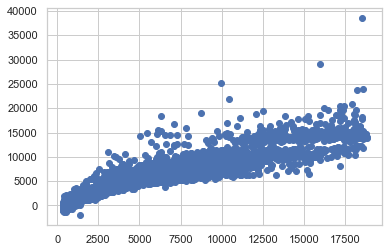

In [655]:
plt.scatter(y_test['price'], y_pred)


In [656]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)


In [657]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [658]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.3507493488245432
The coefficient for cut is -0.04591873630834351
The coefficient for color is 0.11821177300430857
The coefficient for clarity is 0.05633452709734163
The coefficient for depth is -0.0470614576104579
The coefficient for table is -0.03177414265288265
The coefficient for x is -0.3820725718759914
The coefficient for y is 0.004812159196094583
The coefficient for z is -0.0029880050845422037


In [659]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -3.606458423806537e-16


In [660]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test_scaled, y_test_scaled)

0.8793845352317776

In [661]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [662]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.3472973722449147

In [663]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test_scaled)

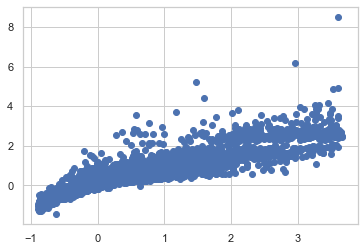

In [664]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test_scaled['price'], y_pred)

In [665]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(13221.98) * Intercept + (11398.77) * carat + (-165.44) * cut + (278.02) * color + (125.86) * clarity + (-135.07) * depth + (-56.99) * table + (-1365.14) * x + (16.36) * y + (-16.55) * z + 

In [666]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 82.1707737067742
cut ---> 2.2994187977906253
color ---> 5.4857149488657955
clarity ---> 2.4090435714189367
depth ---> 528.5629310822427
table ---> 563.8715244546008
x ---> 1127.3178358175
y ---> 347.70355721286177
z ---> 384.9851676872424


In [835]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = data_df.drop('price', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = data_df[['price']]


In [668]:
from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)  # ideally the training and test should be


In [669]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 11398.771362453324
The coefficient for cut is -165.4352925997742
The coefficient for color is 278.0216969804327
The coefficient for clarity is 125.86262495527605
The coefficient for depth is -135.06770691187498
The coefficient for table is -56.99109228851156
The coefficient for x is -1365.1426823629158
The coefficient for y is 16.35680097832453
The coefficient for z is -16.549502984566768


In [670]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 13221.979190124352


# Create a regularized RIDGE model and note the coefficients

In [671]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
    

Ridge model: [[11377.53576702  -165.47593612   277.88710937   125.99550921
   -134.65697141   -56.95293188 -1356.26537734    16.36884346
    -16.70143099]]


# Create a regularized LASSO model and note the coefficients

In [672]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [11382.44928057  -165.41442673   277.89434909   125.94418166
  -134.79094088   -56.95653333 -1357.65140998    14.97865581
   -15.4322682 ]


## Let us compare their scores


In [673]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.8761331489567026
0.8794107659488494


In [674]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.876132897559982
0.8794128913537292


In [675]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8761329788511019
0.8794107560331644


# Let us generate polynomial models reflecting the non-linear interaction between some dimensions

In [676]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only=True)

#poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(18847, 46)

# Fit a simple non regularized linear model on poly features-

In [677]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])


[ 5.06138569e-13  3.15986460e+03 -1.44257344e+02  5.02723111e+02
  2.18810391e+02 -3.77154988e+01 -7.29090747e+01 -2.37931250e+03
  2.62244781e+03  4.99558745e+02 -1.18210468e+02  2.03984183e+02
 -1.66655512e+03 -1.05756710e+01  3.65938242e+02 -7.63595065e+03
  6.00455259e+03  1.09976349e+03 -5.92019133e+01 -1.04071217e+02
  4.47827348e+01  8.33879663e+00  4.14275639e+02  1.09586106e+02
 -5.96636990e+02  7.21583648e+01  7.46059488e+00 -4.39738405e+01
 -7.98534756e+02  1.07683085e+03  2.42241540e+01 -4.31010480e+00
 -3.70115934e+01 -2.15121194e+03  3.45093216e+03  4.92388145e+02
 -3.89794846e+01  4.56350077e+02 -1.52038785e+02 -2.08196816e+02
  4.74123001e+02 -1.03613626e+03  1.22028923e+02  2.82057487e+03
  2.46839180e+03 -3.71568288e+03]


In [678]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.00000000e+00  3.13999238e+03 -1.43596838e+02  5.02540242e+02
   2.18607072e+02 -4.28430542e+01 -7.27178375e+01 -2.35345718e+03
   2.54820022e+03  5.64912699e+02 -1.17323270e+02  2.03169020e+02
  -1.67041629e+03 -5.85922165e+01  3.63338284e+02 -7.35446074e+03
   5.32335623e+03  1.48487175e+03 -5.86993855e+01 -1.03896690e+02
   4.77389917e+01  9.15817450e+00  4.18378193e+02  1.26798777e+02
  -6.18453584e+02  7.21972041e+01  7.39250031e+00 -4.46765361e+01
  -7.43016995e+02  1.02433426e+03  1.94804256e+01 -1.09621159e+00
  -3.77663101e+01 -2.07303682e+03  3.40188536e+03  4.63529982e+02
  -4.25543221e+01  4.73500848e+02 -1.11808727e+02 -2.11372749e+02
   4.16560122e+02 -1.00691658e+03  1.54203382e+02  3.27435142e+03
   1.88730262e+03 -3.57680885e+03]]


In [679]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))


0.9148202804295886
0.906787441146191


In [680]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.00000000e+00  3.42363708e+03 -1.33659201e+02  4.98452843e+02
  2.15722616e+02  5.62550963e+00 -7.74658556e+01 -1.91255596e+03
  2.33899898e+03  3.85018739e+01 -6.39226404e+01  1.98721858e+02
 -1.75363510e+03  6.61469152e+01  2.74323392e+02 -2.60937632e+03
  1.62213496e+03  2.84440732e+02 -5.13818567e+01 -1.04434292e+02
  1.29309681e+01  2.16830522e+01  1.09077973e+02  8.42218879e+00
 -2.23706458e+02  7.06332808e+01  2.16159460e+01 -5.66260217e+01
 -5.15865336e+01  5.17525346e+02 -1.91049918e+02  8.22811431e+01
 -4.43003758e+01 -9.38594085e+02  2.99469528e+03 -2.27443899e+02
 -3.09151188e+00 -3.50732715e+02  7.16612468e+02 -2.58261954e+02
 -3.11892855e+02  1.18278671e+02 -1.48066908e+02  2.50324607e+03
  5.94212855e+02 -1.53864566e+03]


In [681]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))


0.913224840350318
0.910395609853834


## 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

Now, since we have established a price predicting equation, we can find the best attributes to 
segregate higher and lower profitable stones
- The most important attribute in governing the price of the cubic zirconia is 'carat' as it has 
highest positive coefficient. If we increase the carat, the price can go up and we can make 
more profit.
- We should maintain the value of 'depth' and 'table' to optimal minimum so as to not 
compromise in quality and yet make more profits as they have negative coefficients.
- The length of the cubic zirconia should be least and width & depth should be optimal 
minimum as all 3 have negative coefficients.
- When the cut quality is of
- 'Ideal' category we can make the most profitable stones of all the possible cut categories 
as it has the highest coefficient which leads to maximum price.
- 'Fair' category we can make the least profitable stones of all the possible cut categories 
as it has the lowest coefficient which leads to minimum price.
- The remaining 3 categories we can make the moderate profitable stones of all the 
possible cut categories as they have coefficient values ranging between the 'Ideal' and 
'Fair' category.
- When the colour quality is of
- 'D' category we can make the most profitable stones of all the possible colour categories 
as it has highest coefficient which leads to maximum price.
- 'J' category we can make the least profitable stones of all the possible colour categories 
as it has lowest coefficient which leads to minimum price.
- The remaining 5 categories we can make the moderate profitable stones of all the 
possible colour categories as they have coefficient values ranging between the 'D' and 'J' 
category.
- When the clarity quality is of
- 'IF' category we can make the most profitable stones of all the possible clarity categories 
as it has highest coefficient which leads to maximum price.
-'I1' category we can make the least profitable stones of all the possible clarity categories 
as it has lowest coefficient which leads to minimum price.
- The remaining 3 categories we can make the moderate profitable stones of all the 
possible clarity categories as they have coefficient values ranging between the 'IF' and 
'I1' category.
- We should make cubic zirconia's of all combinations of coefficients (i.e. positive & 
negative). By doing this, we can target all kinds of purchasing population by making gems 
of all possible price ranges, thereby make profits for all kinds of gems

## Problem Statement 2.Logistic Regression and LDA

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import metrics
import math
from sklearn.linear_model import LogisticRegression
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
plt.rc("font", size=14)

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.preprocessing import scale
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


 # Import the Dataset

In [2]:
df=pd.read_csv('Holiday_Package (2).csv')

## 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [3]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [5]:
df.shape

(872, 8)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()
df=df.dropna()

In [8]:
df.isnull().sum().any()

False

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,872.0,436.500000,251.869014,1.0,218.75,436.5,654.25,872.0
Salary,872.0,47729.172018,23418.668531,1322.0,35324.00,41903.5,53469.50,236961.0
age,872.0,39.955275,10.551675,20.0,32.00,39.0,48.00,62.0
educ,872.0,9.307339,3.036259,1.0,8.00,9.0,12.00,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.00,0.0,0.00,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.00,1.0,2.00,6.0


In [11]:
df.dtypes

Unnamed: 0            int64
Holliday_Package     object
Salary                int64
age                   int64
educ                  int64
no_young_children     int64
no_older_children     int64
foreign              object
dtype: object

In [12]:
df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [13]:
df.isnull().sum().any()

False

In [14]:
df.nunique()

Unnamed: 0           872
Holliday_Package       2
Salary               864
age                   43
educ                  20
no_young_children      4
no_older_children      7
foreign                2
dtype: int64

In [15]:
lda_df=df.drop('Unnamed: 0',axis=1)

In [837]:
lda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 54.5+ KB


In [16]:
lda_df.head(5)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [17]:
df['Holliday_Package'].unique()

array(['no', 'yes'], dtype=object)

In [18]:

df['foreign'].unique()

array(['no', 'yes'], dtype=object)

In [19]:
df['Holliday_Package'].value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [20]:
df['foreign'].value_counts()

no     656
yes    216
Name: foreign, dtype: int64

In [21]:
df= df.copy()
df= df.drop(['Holliday_Package','foreign'],axis=1)

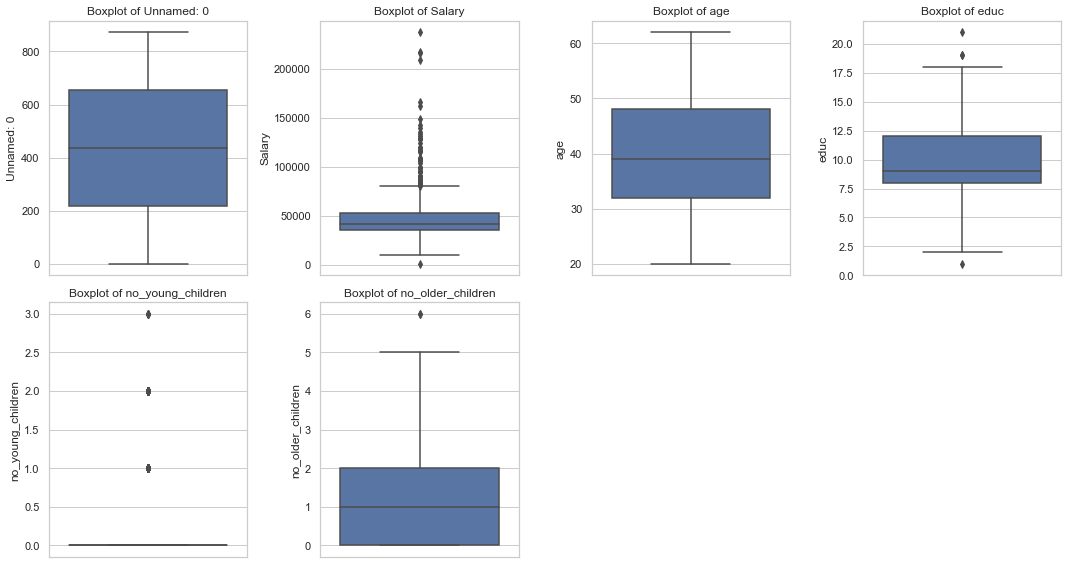

In [22]:

plt.figure(figsize=(15,8))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

C:\Users\sankesh nagrare\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sankesh nagrare\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sankesh nagrare\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

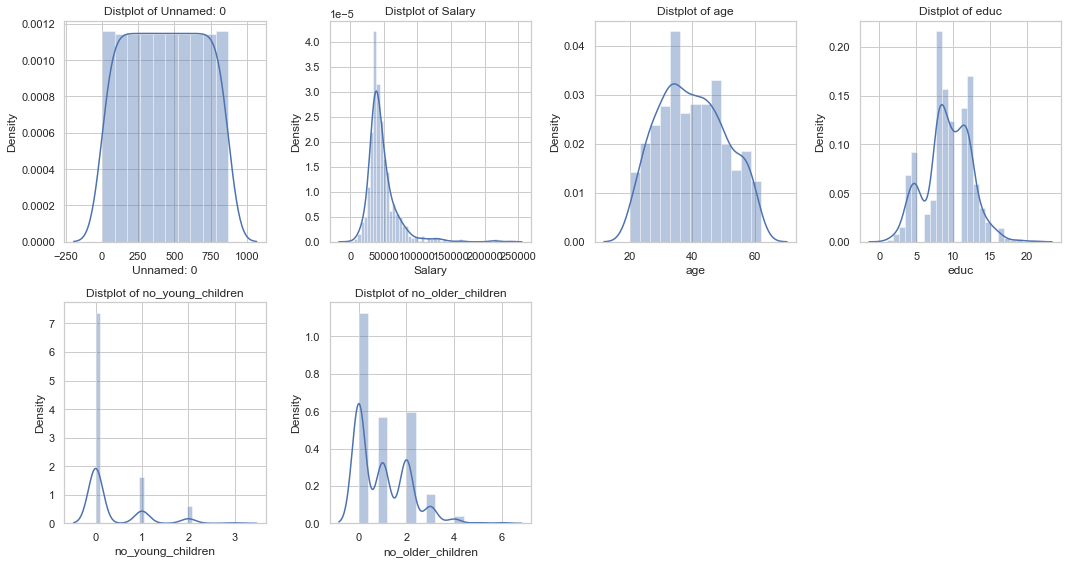

In [23]:
plt.figure(figsize=(15,8))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(2, 4, i + 1)
    sns.distplot(df[df.columns[i]])
    plt.title('Distplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [24]:
df.skew(axis = 0)

Unnamed: 0           0.000000
Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

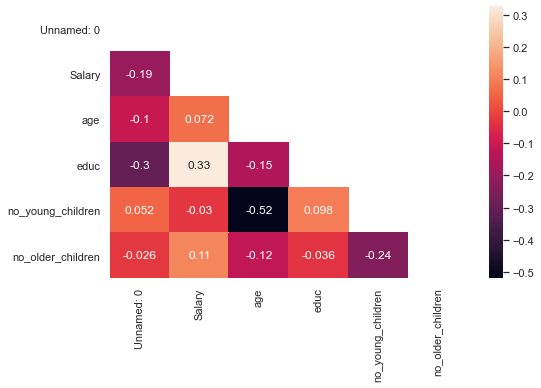

In [25]:
plt.figure(figsize=(8,5));
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,annot=True,mask=mask);

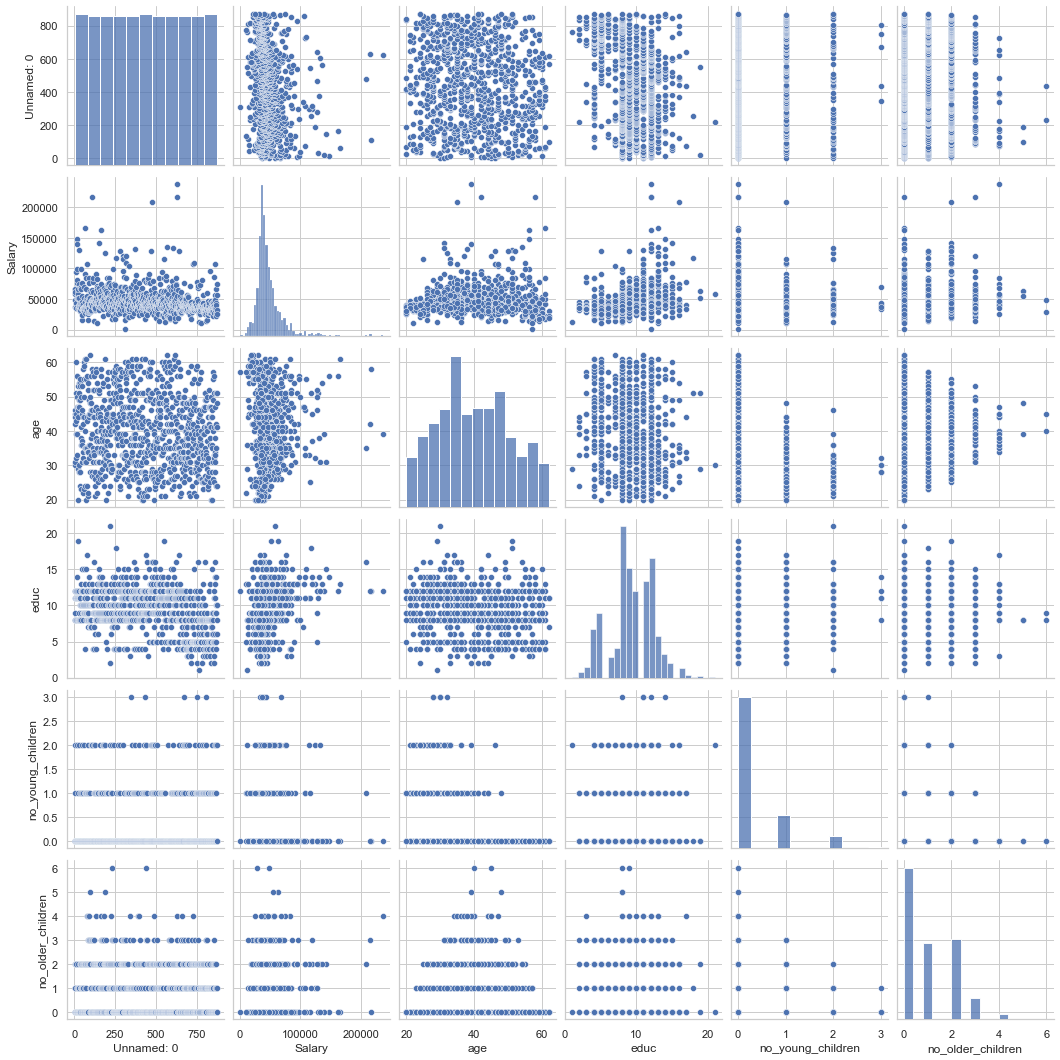

In [26]:
sns.pairplot(df);

In [27]:
corr = df.corr()
corr

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
Unnamed: 0,1.000000,-0.193249,-0.103782,-0.296015,0.052146,-0.025852
Salary,-0.193249,1.000000,0.071709,0.326540,-0.029664,0.113772
age,-0.103782,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,-0.296015,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,0.052146,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,-0.025852,0.113772,-0.116205,-0.036321,-0.238428,1.000000


## 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

**Encode the Data**

In [28]:
data_df=pd.get_dummies(lda_df,columns = ['Holliday_Package','foreign'],drop_first=True)

In [29]:
data_df.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412,30,8,1,1,0,0
1,37207,45,8,0,1,1,0
2,58022,46,9,0,0,0,0
3,66503,31,11,2,0,0,0
4,66734,44,12,0,2,0,0


In [30]:
data_df.tail()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
867,40030,24,4,2,1,0,1
868,32137,48,8,0,0,1,1
869,25178,24,6,2,0,0,1
870,55958,41,10,0,1,1,1
871,74659,51,10,0,0,0,1


In [31]:
df.select_dtypes(include='object').head()

""
0
1
2
3
4


# Convert Object Feature types for Linear Discriminant Analysis

**Split the Data**

In [32]:
X=data_df.drop('Holliday_Package_yes',axis=1)

In [33]:
Y=data_df['Holliday_Package_yes']

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1,test_size=0.30)

In [35]:
print(Y_test.value_counts())
print('\n')
print(Y_train.value_counts(1))

0    145
1    117
Name: Holliday_Package_yes, dtype: int64


0    0.534426
1    0.465574
Name: Holliday_Package_yes, dtype: float64


In [36]:
print(Y_train.value_counts())
print('\n')
print(Y_train.value_counts(1))

0    326
1    284
Name: Holliday_Package_yes, dtype: int64


0    0.534426
1    0.465574
Name: Holliday_Package_yes, dtype: float64


In [37]:
X_test.value_counts()

Salary  age  educ  no_young_children  no_older_children  foreign_yes
10551   22   13    1                  0                  0              1
46488   50   7     0                  1                  1              1
46666   43   9     0                  0                  0              1
46747   41   5     0                  2                  1              1
46846   57   10    0                  0                  0              1
                                                                       ..
36839   26   7     1                  1                  1              1
36949   33   12    0                  2                  0              1
36976   54   7     0                  2                  0              1
37069   26   13    2                  0                  0              1
236961  39   12    0                  4                  0              1
Length: 262, dtype: int64

In [38]:

print(X_train.value_counts())


Salary  age  educ  no_young_children  no_older_children  foreign_yes
1322    57   12    0                  0                  0              1
49052   45   8     0                  6                  0              1
48376   47   8     0                  1                  0              1
48398   45   10    0                  3                  0              1
48578   44   12    0                  0                  0              1
                                                                       ..
37685   56   12    0                  1                  0              1
37690   49   8     0                  0                  0              1
37726   58   8     0                  0                  0              1
37733   39   9     0                  2                  0              1
215675  42   12    0                  3                  0              1
Length: 610, dtype: int64


# Applying Grid search method 


In [39]:
grid={'penalty':['l1','l2','none'],'solver':['abcd','liblinear'],'tol':[0.0001,0.000001]}

In [40]:
LogR=LogisticRegression(max_iter=100000,n_jobs=2)

In [41]:
grid_search=GridSearchCV(estimator=LogR,param_grid=grid,cv=3,n_jobs=1,scoring='f1')

In [42]:
grid_search.fit(X_train,Y_train)

C:\Users\sankesh nagrare\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sankesh nagrare\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sankesh nagrare\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sankesh nagrare\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got abcd.

  warnings.warn("Estimator fit failed. The score on this t

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=2),
             n_jobs=1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['abcd', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [43]:
print(grid_search.best_params_)
print('\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-06}


LogisticRegression(max_iter=100000, n_jobs=2, solver='liblinear', tol=1e-06)


In [44]:
best_model = grid_search.best_estimator_
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.752788,0.247212
1,0.289978,0.710022
2,0.894640,0.105360
3,0.968592,0.031408
4,0.475202,0.524798


In [45]:
ytrain_predict_prob=best_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.739557,0.260443
1,0.308481,0.691519
2,0.973562,0.026438
3,0.636344,0.363656
4,0.422715,0.577285


# Accuracy for training and testing data

In [46]:
best_model.score(X_train,Y_train)

0.6704918032786885

# Auc,ROC curve for train data

AUC: 0.743


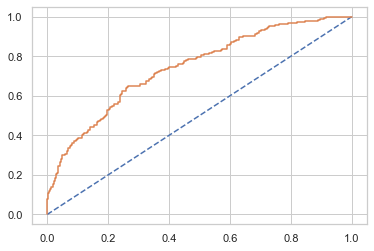

In [52]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs_cart = grid_search.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(Y_train, probs_cart)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(Y_train, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

### AUC and ROC for the test data

AUC: 0.702


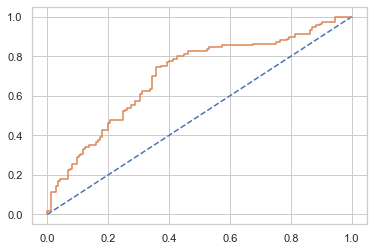

In [55]:
# predict probabilities
probs_cart = grid_search.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(Y_test, probs_cart)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(Y_test, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

### Confusion matrix for train data

In [62]:
LogR.fit(X_train, Y_train)

LogisticRegression(max_iter=100000, n_jobs=2)

In [57]:
LogR.fit(X_test, Y_test)

LogisticRegression(max_iter=100000, n_jobs=2)

In [63]:
ytrain_predict = LogR.predict(X_train)
ytest_predict = LogR.predict(X_test)

In [67]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
confusion_matrix(Y_train, ytrain_predict)

array([[294,  32],
       [261,  23]], dtype=int64)

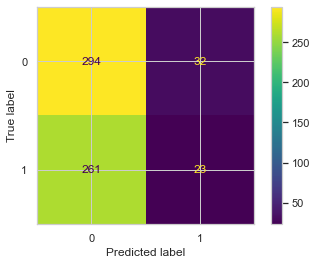

In [71]:
plot_confusion_matrix(LogR,X_train,Y_train);

In [73]:
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.53      0.90      0.67       326
           1       0.42      0.08      0.14       284

    accuracy                           0.52       610
   macro avg       0.47      0.49      0.40       610
weighted avg       0.48      0.52      0.42       610



### Confusion matrix for Test Data


In [74]:
LogR.fit(X_test, Y_test)

LogisticRegression(max_iter=100000, n_jobs=2)

In [76]:
confusion_matrix(Y_test, ytest_predict)

array([[129,  16],
       [107,  10]], dtype=int64)

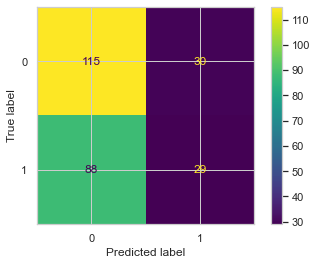

In [77]:
plot_confusion_matrix(LogR,X_test,Y_test);

In [79]:
print('Confusion Matrix','\n',metrics.confusion_matrix(Y_test, ytest_predict),'\n')
print('Classification Report','\n',metrics.classification_report(Y_test, ytest_predict))

Confusion Matrix 
 [[129  16]
 [107  10]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.55      0.89      0.68       145
           1       0.38      0.09      0.14       117

    accuracy                           0.53       262
   macro avg       0.47      0.49      0.41       262
weighted avg       0.47      0.53      0.44       262



### Linear Discriminant Analysis


In [82]:
clf=LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)
pred_class_train=model.predict(X_train)
pred_class_test=model.predict(X_test)

### Predicting the Variable

In [83]:
pred_prob_train = model.predict_proba(X_train)

pred_prob_test = model.predict_proba(X_test)
pred_prob_train[:,1]

array([0.24451841, 0.74473838, 0.02926233, 0.33696244, 0.53643674,
       0.77166141, 0.42537442, 0.29503123, 0.22447685, 0.30070348,
       0.28534521, 0.25472358, 0.36253223, 0.49555106, 0.43238182,
       0.76289172, 0.76180657, 0.13440254, 0.43765202, 0.8874783 ,
       0.70795813, 0.17152298, 0.21548115, 0.63053721, 0.2367007 ,
       0.32348888, 0.64312884, 0.32722211, 0.85239686, 0.28937042,
       0.70512591, 0.80009771, 0.52040802, 0.27686374, 0.3164615 ,
       0.54760845, 0.52040327, 0.31517416, 0.44152214, 0.06906226,
       0.34406846, 0.54935353, 0.29231453, 0.88221405, 0.07678677,
       0.76222865, 0.68956941, 0.1184114 , 0.06581715, 0.55511382,
       0.47496466, 0.24377183, 0.66339382, 0.45779134, 0.89305876,
       0.44876138, 0.65167779, 0.2604166 , 0.68041423, 0.33655869,
       0.3568944 , 0.25495093, 0.18266474, 0.11733085, 0.30783826,
       0.36037879, 0.54026683, 0.58991236, 0.06395937, 0.59328948,
       0.63404283, 0.23717375, 0.38986934, 0.78549853, 0.37122

### MODEL Score for train set


In [84]:
model.score(X_train , Y_train)

0.6721311475409836

In [85]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
Y_predict = model.predict(X_test)
model_score = model.score(X_test, Y_test)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.5305343511450382


In [98]:
model = LogisticRegression()
model.fit(X_train, Y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, y_predict))
print(metrics.classification_report(Y_test, y_predict))

0.5305343511450382
[[129  16]
 [107  10]]
              precision    recall  f1-score   support

           0       0.55      0.89      0.68       145
           1       0.38      0.09      0.14       117

    accuracy                           0.53       262
   macro avg       0.47      0.49      0.41       262
weighted avg       0.47      0.53      0.44       262



In [87]:
confusion_matrix(Y_train,pred_class_train)

array([[252,  74],
       [126, 158]], dtype=int64)

### Model Score for Test set

In [89]:
model.score(X_test , Y_test)

0.5305343511450382

In [91]:
print(classification_report(Y_test,pred_class_test))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



In [92]:
confusion_matrix(Y_test,pred_class_test)

array([[103,  42],
       [ 52,  65]], dtype=int64)

## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

## Checking the performance of prediction on Train and Test Sets using Accuracy 

In [94]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, Y_test)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.5305343511450382


### Changing the Cutoff Value for better Accuracy 

0.1 

Accuracy Score 0.4918
F1 Score 0.6461 

Confusion Matrix


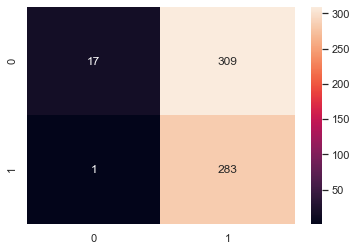

0.2 

Accuracy Score 0.5361
F1 Score 0.6627 

Confusion Matrix


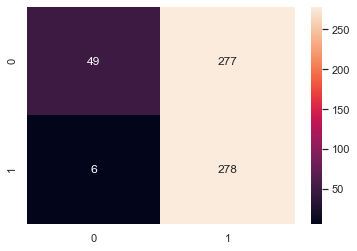

0.3 

Accuracy Score 0.5984
F1 Score 0.6738 

Confusion Matrix


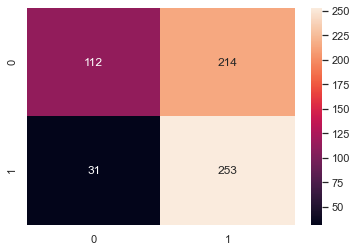

0.4 

Accuracy Score 0.6672
F1 Score 0.6762 

Confusion Matrix


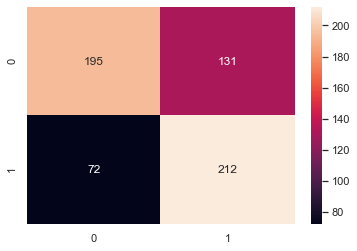

0.5 

Accuracy Score 0.6721
F1 Score 0.6124 

Confusion Matrix


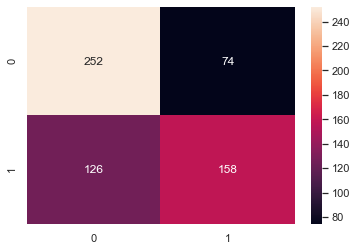

0.6 

Accuracy Score 0.659
F1 Score 0.5357 

Confusion Matrix


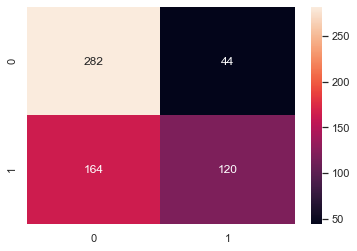

0.7 

Accuracy Score 0.6475
F1 Score 0.4557 

Confusion Matrix


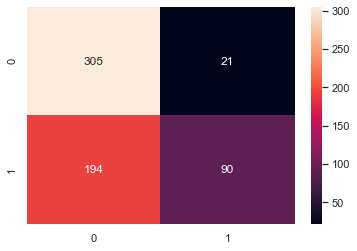

0.8 

Accuracy Score 0.6
F1 Score 0.2695 

Confusion Matrix


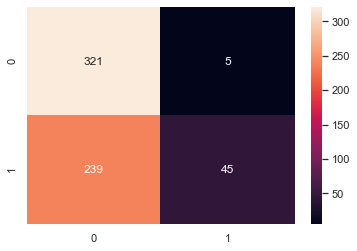

0.9 

Accuracy Score 0.5426
F1 Score 0.0346 

Confusion Matrix


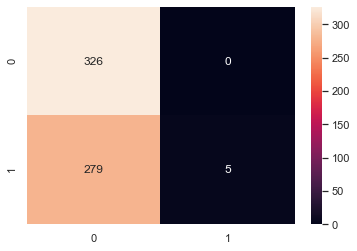

In [97]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(Y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

### AUC and ROC for the training data

AUC for the Training Data: 0.742
AUC for the Test Data: 0.703


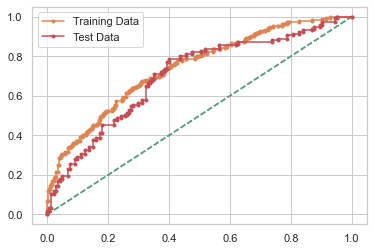

In [101]:

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Training Data and Test data confusion matrix Comparison

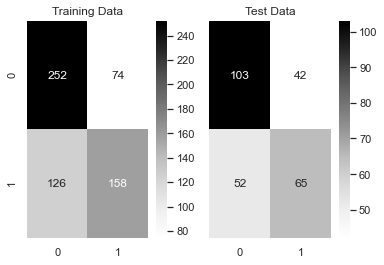

In [103]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

### Q2.4) Inference: Basis on these predictions, what are the insights and recommendations.

Mentioned at proect report